<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
فعالیت‌بدنی‌بندی</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مجموعه‌داده‌های <b>تشخیص فعالیت انسانی (HAR)</b> مجموعه‌ای از داده‌های حسگر هستند که هدف آنها دسته‌بندی و شناسایی فعالیت‌های مختلف انسانی بر اساس الگوهای موجود در خوانش‌های حسگر است. در تحقیقات یادگیری ماشین و داده‌کاوی از این مجموعه‌داده‌ها برای توسعه‌ی الگوریتم‌ها و مدل‌های سیستم‌های تشخیص فعالیت استفاده می‌شوند. ویژگی‌های مجموعه‌داده‌های HAR معمولاً برگرفته از داده‌های حسگرهای مختلف مانند شتاب‌سنج، ژیروسکوپ و مغناطیس‌سنج است. این سنسورها معمولاً در گوشی‌های هوشمند، ساعت‌های هوشمند و دستگاه‌های پوشیدنی یافت می‌شوند. حسگرها داده‌های مربوط به حرکت و جهت‌گیری دستگاه و همچنین محیط اطراف را ثبت می‌کنند. در صورت علاقه، می‌توانید نمونه‌ای از ثبت این داده‌ها را در <a href="https://www.youtube.com/watch?v=XOEN9W05_4A">این ویدیو</a> مشاهده کنید. این اندازه‌گیری‌ها در فواصل زمانی منظم گرفته می‌شوند و به‌عنوان داده‌های سری زمانی نشان داده می‌شوند. هدف مجموعه‌داده‌های HAR شناسایی و دسته‌بندی دقیق فعالیت‌های انسانی خاص است. این فعالیت‌ها می توانند بسته به کاربرد یا زمینه‌ی مورد مطالعه متفاوت باشند. نمونه‌هایی از فعالیت‌های رایج شناخته‌شده عبارتند از راه رفتن، دویدن، ایستادن، نشستن، بالا رفتن از پله‌ها و فعالیت‌های مرتبط با ورزش یا تناسب اندام. هدف، ساخت مدل‌های پیش‌بینی‌کننده است تا بتوانند به‌طور خودکار این فعالیت‌ها را بر اساس الگوهای آشکار یا پنهان موجود در داده‌های حسگر تشخیص دهند و بین‌شان تمایز قائل شوند.
<br>
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مجموعه‌داده</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در مجموعه‌داده‌ای که در اختیار شما قرار گرفته به‌ازای هر داده‌ای که ثبت شده نوع فعالیت آن در ستون <code>Activity_Name</code> نوشته شده است. انواع فعالیت موجود در این مجموعه‌داده عبارتند از:

</font>
</p>

<center>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| مقدار | نوع فعالیت |
| :---: | :---: |
| Walking | راه رفتن |
| Walking_Upstairs | بالا رفتن از پله‌ها |
| Walking_Downstairs | پایین رفتن از پله‌ها |
| Sitting | نشستن |
| Standing | ایستادن |
| Laying | خوابیدن |

</font>
</p>
</center>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا مجموعه‌داده‌های آموزش (<code>train</code>) و آزمون (<code>test</code>) از فایل‌های موجود در پوشه بخوانید. البته نیازی به ستون <code>subject</code> نیست. در صورت تمایل می‌توانید بخشی از مجموعه‌ی آموزشی را جدا کرده و برای اعتبارسنجی (<code>validation</code>) استفاده کنید.
    </font>
</p>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  accuracy_score,f1_score, confusion_matrix, classification_report, r2_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [3]:
print(train.shape)
print(test.shape)

(7352, 563)
(2947, 561)


In [4]:
train.drop('Subject', axis=1, inplace=True)

In [5]:
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity_Name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,Standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,Standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,Standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,Standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,Standing


In [6]:
test.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.283669,-0.015857,-0.059881,-0.973736,-0.899287,-0.782522,-0.976986,-0.894329,-0.785570,-0.895825,...,0.223438,-0.252492,-0.658040,0.003614,0.096807,0.451286,0.493474,-0.852602,0.188326,0.067392
1,0.322557,-0.039917,-0.082557,-0.355588,-0.337817,-0.265232,-0.397431,-0.341815,-0.276091,-0.073071,...,0.427286,-0.433622,-0.781109,-0.375235,-0.345779,0.428791,-0.359078,-0.664690,0.265582,0.181672
2,0.294853,-0.010700,-0.100636,-0.980507,-0.895418,-0.963306,-0.980855,-0.884619,-0.964184,-0.927680,...,0.337037,-0.439849,-0.723350,-0.392573,0.320364,0.554949,-0.501292,-0.857665,0.188949,-0.021815
3,0.285264,-0.015595,-0.150264,-0.236935,0.523830,-0.378750,-0.297927,0.478829,-0.384961,0.133768,...,0.361520,0.805276,0.721432,-0.042795,0.299331,0.584471,0.817918,-0.711628,0.297052,0.006109
4,0.311611,-0.015282,-0.109654,-0.932390,-0.983798,-0.971810,-0.926542,-0.981748,-0.969975,-0.888423,...,0.191532,0.049477,-0.254858,-0.022340,0.000328,-0.173259,-0.466109,0.592952,-0.416970,-0.593468


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">تحلیل اکتشافی داده</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا پیشنهاد می‌کنیم کمی به بررسی دقیق‌تر و آماری داده‌هایی که در دسترس‌تان است بپردازید و در صورت علاقه نمودارهایی را جهت بررسی توزیع‌های داده رسم کنید.
<span style="color:orange">(اختیاری)</span>
</font>
</p>

In [7]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


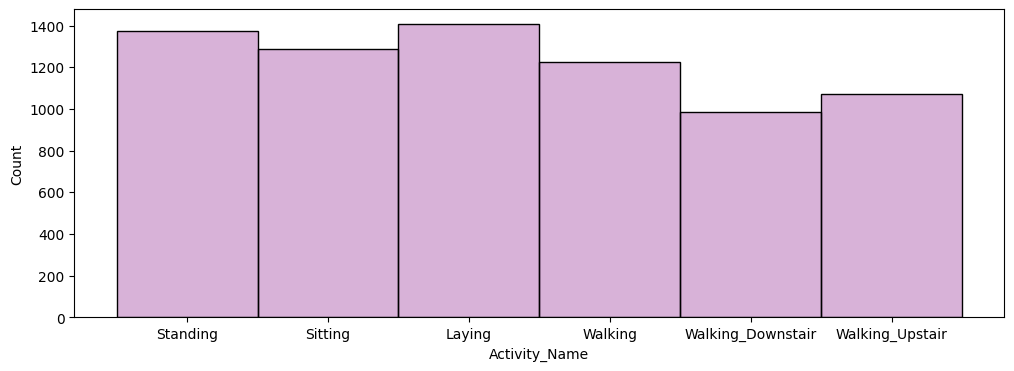

In [8]:
plt.figure(figsize=(12, 4))  
sns.histplot(train, x='Activity_Name', bins=5, color='purple', alpha=0.3)
plt.show()

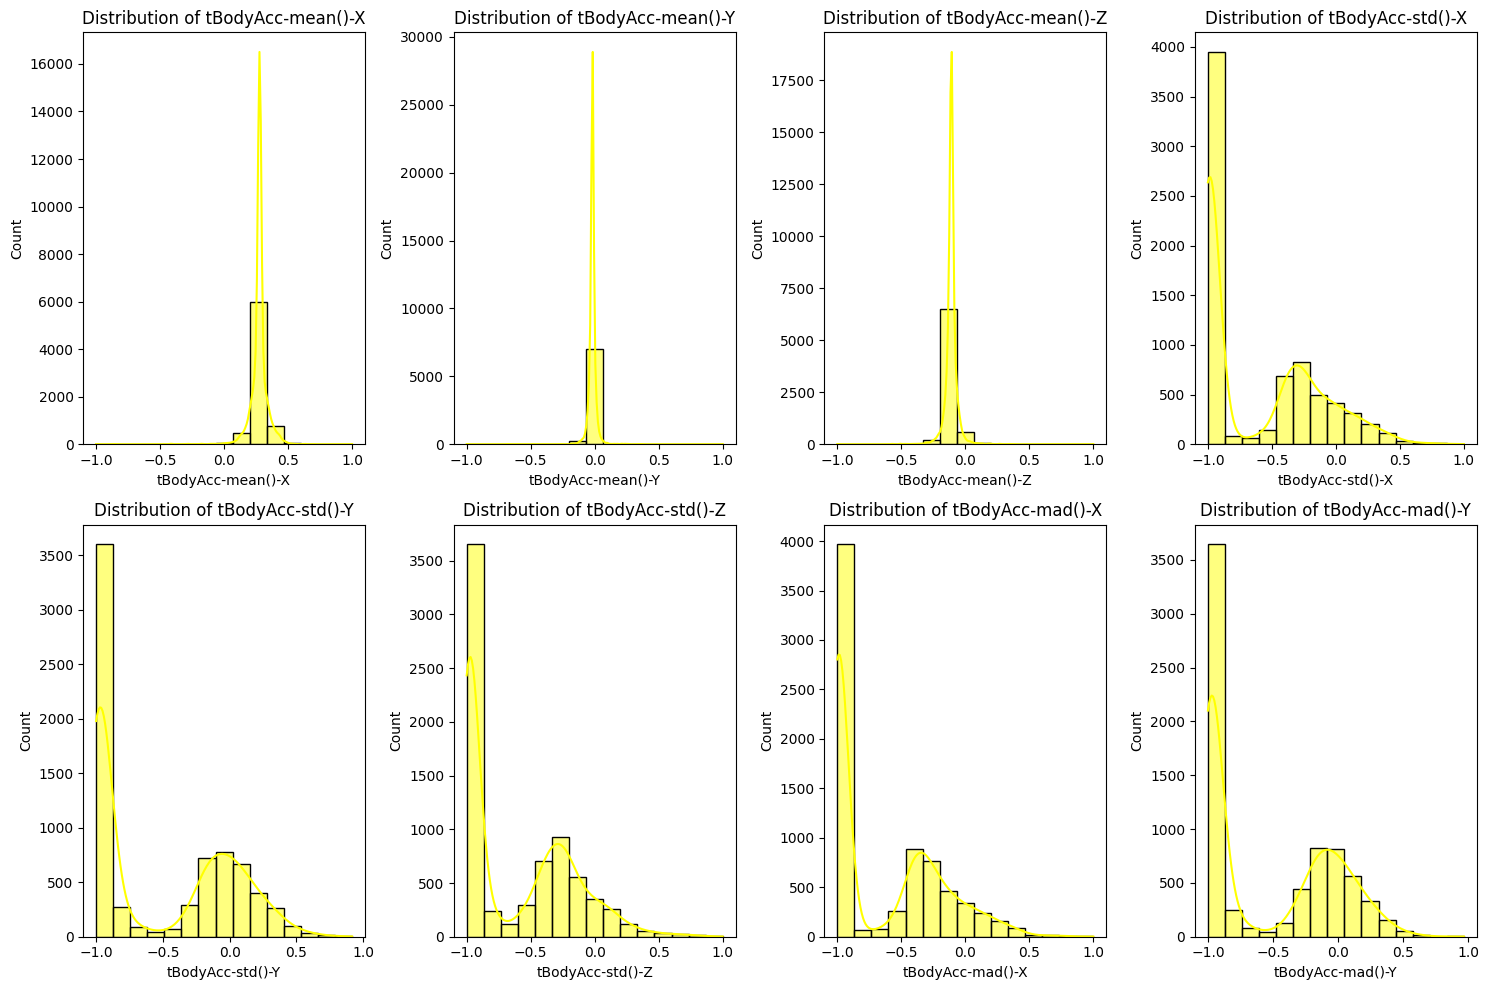

In [9]:
selected_columns = train.iloc[:, :8]
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns.columns, 1):
    plt.subplot(2, 4, i)  
    sns.histplot(train[col], kde=True, bins=15, color='yellow')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [10]:
train.isnull().sum().sum()

0

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مهندسی ویژگی</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
طبق بررسی‌هایی که از داده‌ها داشته‌اید یا جهت دست‌یابی به عملکرد بهتر در مدل‌های پیش‌بینی‌کننده‌ی خود ممکن است به مهندسی ویژگی‌‌ها (کدگذاری متغیر هدف،‌ حذف ویژگی‌ها، تغییر نوع ویژگی‌ها، ساخت ویژگی جدید، تغییر مقیاس و غیره) نیاز داشته باشید. در این‌صورت می‌توانید در این قسمت از هر روش یا ابزاری که مناسب می‌دانید به‌منظور مهندسی ویژگی‌ها استفاده کنید.
</font>
</p>

In [11]:
activity_mapping = {
    'Laying':0,
    'Standing':1,
    'Sitting':2,
    'Walking':3,
    'Walking_Upstair':4,
    'Walking_Downstair':5
}
train["Activity_Name"] =train.Activity_Name.map(activity_mapping)  

In [12]:
X = train.drop(columns=["Activity_Name"])
y = train["Activity_Name"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
scaler = StandardScaler()
X_train_scaled = X_train
X_test_scaled = X_test
test_scaled = test


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مدل‌سازی</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون می‌توانید با استفاده از الگوریتم‌های یادگیری ماشین، مدلی آموزش دهید که با گرفتن مقادیر ویژگی‌های دریافتی از سنسورها، نوع فعالیت در حال انجام را پیش‌بینی کند.
در این قسمت از شما می‌خواهیم از الگوریتم درخت تصمیم یا الگوریتم های تجمیعی  استفاده کنید و ترکیب‌های مختلفی از هایپرپارامترهای مهم این الگوریتم هارا آزمایش کنید تا بهترین مدل را برای پیش‌بینی فعالیت‌های انسانی انتخاب کنید. در این قسمت می‌توانید از کتابخانه‌ی <code>sklearn</code> استفاده کنید و برای جست‌وجوی هایپرپارامترها می‌توانید از روشی همچون Grid Search استفاده کنید. منطقی است که برای پیدا کردن بهترین ترکیب هایپرپارامتر نیاز به مجموعه‌ی اعتبارسنجی یا استفاده از روش‌هایی مانند Cross Validation دارید.
</font>
</p>

In [16]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"Training F1 Score: {train_f1:.10f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 1.0000
Test Accuracy: 0.9952
Training F1 Score: 1.0000000000
Test F1 Score: 0.9952
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       0.99      0.99      0.99       275
           2       0.99      0.99      0.99       257
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       215
           5       1.00      0.99      1.00       197

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [17]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
y_train_pred = dt_model.predict(X_train_scaled)
y_test_pred = dt_model.predict(X_test_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"Training F1 Score: {train_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 1.0000
Test Accuracy: 0.9504
Training F1 Score: 1.0000
Test F1 Score: 0.9504
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       0.92      0.95      0.93       275
           2       0.94      0.91      0.92       257
           3       0.97      0.96      0.97       245
           4       0.93      0.95      0.94       215
           5       0.93      0.92      0.93       197

    accuracy                           0.95      1471
   macro avg       0.95      0.95      0.95      1471
weighted avg       0.95      0.95      0.95      1471



In [18]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"Training F1 Score: {train_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 1.0000
Test Accuracy: 0.9864
Training F1 Score: 1.0000
Test F1 Score: 0.9864
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       0.97      0.97      0.97       275
           2       0.97      0.97      0.97       257
           3       1.00      0.99      0.99       245
           4       0.99      1.00      1.00       215
           5       0.98      0.99      0.99       197

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471



In [19]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

xgb_model = XGBClassifier(eval_metric="mlogloss", random_state=42)

param_dist = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [ 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 9],
    "gamma": [0, 0.1, 0.2],
}

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=20, scoring="accuracy", cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print(random_search.best_params_)
print(random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.1}
0.9860565031724061


In [20]:
random_search.best_estimator_.fit(X_train_scaled, y_train)
y_train_pred = random_search.best_estimator_.predict(X_train_scaled)
y_test_pred = random_search.best_estimator_.predict(X_test_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"Training F1 Score: {train_f1:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 1.0000
Test Accuracy: 0.9952
Training F1 Score: 1.0000
Test F1 Score: 0.9952
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       0.99      0.99      0.99       275
           2       0.98      0.99      0.99       257
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       215
           5       1.00      1.00      1.00       197

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471

[CV] END gamma=0, learning_rate=0.05, max_depth=9, n_estimators=200; total time= 5.2min
[CV] END gamma=0.1, learning_rate=0.2, max_depth=3, n_estimators=300; total time= 2.5min
[CV] END gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=200; total time= 2.2min
[CV] END gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=300; total time= 3.8min
[CV] E

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به نتایجی که بر روی هر ترکیب هایپرپارامتر به دست آورده‌اید،‌ تاثیر هر یک از هایپرپارامترها را بر روی عملکرد مدل چه می‌دانید؟ دلایل و تحلیل خود را در سلول زیر بنویسید:
<span style="color:red">(ضروری)</span>
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc"><font face="vazir" size=3><i>
n_estimators
تعداد درخت‌های تصمیم که در مدل گنجانده می‌شود. مقدار بیشتر باعث یادگیری بهتر مدل می‌شود اما زمان پردازش را افزایش می‌دهد.
max_depth
حداکثر عمق هر درخت تصمیم. مقدار بیشتر باعث یادگیری ویژگی‌های پیچیده‌تر می‌شود اما ممکن است منجر به بیش‌برازش (Overfitting) شود.
learning_rate
نرخ یادگیری که مقدار به‌روزرسانی وزن‌ها را در هر مرحله کنترل می‌کند. مقدار کمتر باعث یادگیری آهسته‌تر ولی پایدارتر می‌شود.
gammش
حداقل کاهش موردنیاز در تابع زیان برای تقسیم یک گره. مقدار بیشتر باعث کاهش پیچیدگی مدل و جلوگیری از بیش‌برازش می‌شود.
eval_metric="mlogloss"
متریک ارزیابی که در اینجا از mlogloss (ضرر لاک‌لایکی چندکلاسه) برای اندازه‌گیری عملکرد مدل استفاده می‌شود.
</i></font></p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال نتایج مدل نهایی انتخاب‌شده را هم بر روی مجموعه‌ی آموزشی و هم اعتبارسنجی گزارش کنید. برای ارزیابی از معیارهای Accuracy، Precision، Recall و F1-Score استفاده کنید. همچنین ماتریس درهم‌ریختگی (Confusion Matrix) را رسم نمایید.
</font>
</p>

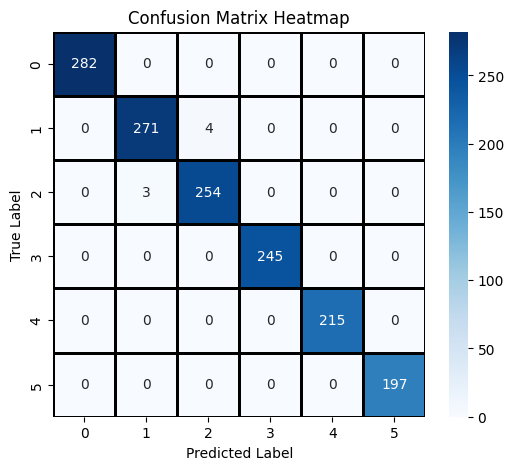

In [21]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", linewidths=1, linecolor='black')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">پیش‌بینی برای مجموعه‌ی آزمون</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون از مدلی که آموزش داده‌اید برای پیش‌بینی نمونه‌های مجموعه‌ی آزمون استفاده کرده تا متوجه شوید که مدل شما تا چه میزان برای نمونه‌های جدید و مشاهده‌نشده موفق عمل می‌کند. نیاز است پیش‌بینی‌های مدل خود را در یک دیتافریم با نام <code>submission</code> که شامل یک ستون به نام <code>Activity_Name</code> است ذخیره کنید. ردیف اول از این دیتافریم، پیش‌بینی مدل شما برای نمونه‌ی نخست و ردیف آخر از آن،‌ پیش‌بینی مدل شما برای نمونه‌ی آخر مجموعه‌ی آزمون است. توجه داشته باشید که مقادیر این ستون باید از جنس دسته‌ای و مشابه با مقادیر آن در مجموعه‌ی آموزشی باشد. یک نمونه‌ی فرضی از دیتافریم شما در جدول زیر نشان داده شده است:
</font>
</p>

<center>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <code>Activity_Name</code> |
| :---: |
| Walking |
| Sitting |
| Sitting |
| Walking_Upstairs |
| ... |

</font>
</p>
</center>

In [22]:
Activity_Name = random_search.best_estimator_.predict(test_scaled)

In [23]:
submission = pd.DataFrame(Activity_Name)
submission.columns = ['Activity_Name']
submission

,Activity_Name
0,1
1,3
2,1
3,3
4,0
...,...
2942,1
2943,3
2944,4
2945,0


In [24]:
activity_mapping = {
    0: 'Laying',
    1: 'Standing',
    2: 'Sitting',
    3: 'Walking',
    4: 'Walking_Upstair',
    5: 'Walking_Downstair'
}

submission['Activity_Name'] = submission['Activity_Name'].map(activity_mapping)
submission

,Activity_Name
0,Standing
1,Walking
2,Standing
3,Walking
4,Laying
...,...
2942,Standing
2943,Walking
2944,Walking_Upstair
2945,Laying


In [25]:
df = pd.read_csv('df_true.csv')

In [26]:
test_f1 = f1_score(submission.Activity_Name.values,df.Activity_Name.values, average='weighted')
print(f"Test F1 Score: {test_f1:.4f}")

Test F1 Score: 0.9435


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">ارزیابی</font>
</h2>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
معیاری که برای ارزیابی مدل شما استفاده خواهد شد <code>F1-score</code> نام دارد و آرگومان میانگین‌گیری آن معادل حالت وزن‌دار (<code dir=ltr>average='weighted'</code>) تنظیم خواهد شد. جهت مطالعه‌ی مستندات این کلاس می‌توانید به <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html" target="_blank">این لینک</a> مراجعه فرمایید.
</font>
</p>


$$F_1=\frac{tp}{tp+\frac{1}{2}(fp+fn)}$$


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>توجه:</b></span>
جهت کسب امتیاز کامل نیاز است پاسخ شما حداقل مقدار(درصد) <code>96</code> را با توجه به این معیار کسب کند.
<br>
<span style="color:orange"><b>نکته:</b></span>
برای پاسخ‌هایی که عملکردی کمتر از این حد آستانه کسب کنند، امتیاز <code>0</code> منظور می‌شود و برای عملکردهایی بهتر از این حد آستانه،‌ به همان میزان، نمره‌ی اضافه برای این بخش در نظر گرفته خواهد شد.
<br>
<span style="color:orange"><b>نکته:</b></span>
از ذخیره بودن نت‌بوک خود در ارسال نهایی اطمینان حاصل کنید زیرا که نت‌بوک شما نیز مورد داوری دستی قرار خواهد گرفت و نمره‌ی نهایی شما از ترکیب نمره‌ی پیش‌بینی مدل و نمره‌ی داوری دستی (راه‌حل و تحلیل) محاسبه خواهد شد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [27]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
file_names = ['human_activity_classification.ipynb', 'submission.csv']
compress(file_names)

File Paths:
['human_activity_classification.ipynb', 'submission.csv']
[CV] END gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200; total time= 4.6min
[CV] END gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200; total time= 4.0min
[CV] END gamma=0, learning_rate=0.2, max_depth=7, n_estimators=100; total time= 1.9min
[CV] END gamma=0, learning_rate=0.05, max_depth=9, n_estimators=300; total time= 6.4min
[CV] END gamma=0.2, learning_rate=0.05, max_depth=7, n_estimators=300; total time= 4.2min
[CV] END gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=200; total time= 3.2min
[CV] END gamma=0.2, learning_rate=0.05, max_depth=5, n_estimators=300; total time= 4.8min
[CV] END gamma=0.2, learning_rate=0.05, max_depth=9, n_estimators=300; total time= 5.3min
[CV] END gamma=0, learning_rate=0.05, max_depth=9, n_estimators=300; total time= 6.3min
[CV] END gamma=0, learning_rate=0.05, max_depth=3, n_estimators=100; total time= 1.2min
[CV] END gamma=0, learning_rate=0.1, max_de